In [31]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [25]:
print(len(mnist.load_data()[0]))
print(len(mnist.load_data()[1]))
print(len(mnist.load_data()[0][0]))
print(len(mnist.load_data()[1][0]))
print(len(mnist.load_data()[0][1]))
print(len(mnist.load_data()[1][1]))


2
2
60000
10000
60000
10000


In [28]:
print(mnist.load_data()[0][0])
print(mnist.load_data()[1][0])
print(mnist.load_data()[0][1])
print(mnist.load_data()[1][1])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ...

## Split data set

In [54]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train * 1.0
y_train = y_train * 1.0
x_test = x_test * 1.0
y_test = y_test * 1.0

# Before the first NN

Concepts to mention

accuracy

measure of error

learning rate

optimizer

loss

learning curves


# Not really

overfit

underfit

## Show images of samples in the dataset

.imshow (?)


## 1st NN

### Activation

In [211]:
from tensorflow.keras.optimizers import RMSprop

model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
    # ??? multiclass
])
model.compile(optimizer=SGD(),
              loss='mean_squared_error',
              metrics=['accuracy']
             )

In [219]:
model.fit(x_train / 255.0, y_train_m, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0264 - acc: 0.7709
Epoch 2/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0259 - acc: 0.7733
Epoch 3/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0254 - acc: 0.7752
Epoch 4/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0250 - acc: 0.7770
Epoch 5/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0247 - acc: 0.7783


In [218]:
model.evaluate(x_test / 255.0, y_test_m)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.0255 - acc: 0.7790


[0.025452108973264696, 0.779]

In [217]:
import numpy as np
f = lambda x : np.eye(1, 10, int(x-1))[0]
#y_train_m = f(y_train)
y_train_m = np.array([f(x) for x in y_train])
y_train_m
y_test_m = np.array([f(x) for x in y_test])
y_test_m

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [153]:
(model.predict(x_test[0:100]))
#y_test[0:11]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.38333602e-36,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 7.48541872e-33, 0.00000000e+00,
        8.78659654e-26, 9.73684427e-30, 0.00000000e+00, 6.45014197e-21,
        2.30110107e-18, 3.42927948e-36],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.46441340e-37,
        1.78102064e-30, 2.18488143e-25, 1.82362408e-16, 4.04959142e-24,
        1.71027237e-28, 3.67215984e-25],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.29653644e-35],
       [0.00000000e+00, 1.00000000e+00, 4.71545677e-38, 3.32066504e-37,
   

## Scaling

<div>
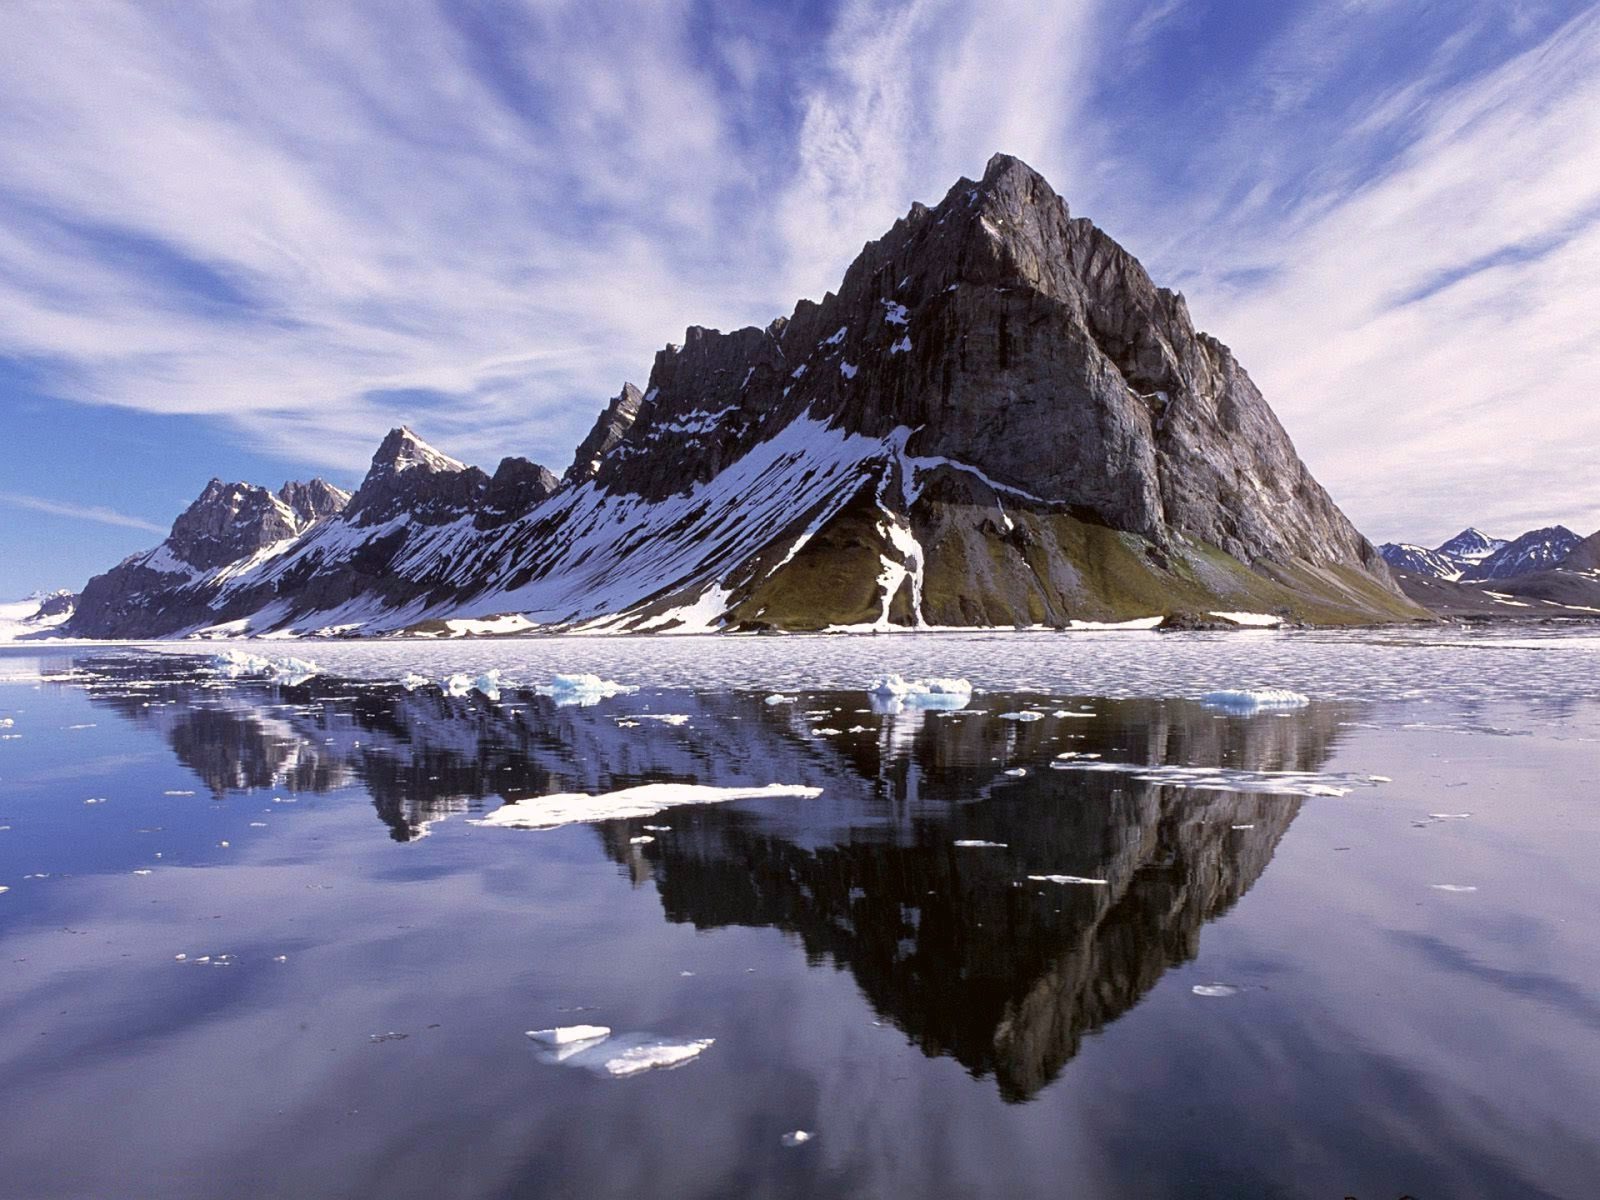
</div>

In [145]:
model.fit(x_train / 255.0, y_train / 255.0, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 82us/sample - loss: 3.2463 - acc: 0.0905
Epoch 2/10
60000/60000 [==============================] - 5s 79us/sample - loss: 11.2026 - acc: 0.1001
Epoch 3/10
60000/60000 [==============================] - 5s 79us/sample - loss: 19.0921 - acc: 0.1011
Epoch 4/10
60000/60000 [==============================] - 5s 84us/sample - loss: 27.0758 - acc: 0.0994
Epoch 5/10
60000/60000 [==============================] - 5s 88us/sample - loss: 34.8938 - acc: 0.1004
Epoch 6/10
60000/60000 [==============================] - 5s 88us/sample - loss: 42.6447 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 5s 82us/sample - loss: 50.6104 - acc: 0.0996
Epoch 8/10
60000/60000 [==============================] - 5s 89us/sample - loss: 58.4596 - acc: 0.0999
Epoch 9/10
60000/60000 [==============================] - 5s 83us/sample - loss: 66.3247 - acc: 0.1001
Epoch 10/10
60000/60000 [==============================] - 5s 86us/sample 

In [146]:
model.evaluate(x_test / 255.0, y_test / 255.0)

10000/10000 [==============================] - 0s 50us/sample - loss: 74.9646 - acc: 0.0000e+00


[74.96463120117187, 0.0]

In [147]:
model.predict(x_test / 255.0)

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 2.0050088e-37],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 3.4187908e-21],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

## Add multiple layers

## Convolutions

Show pictures with results, with different convolutions.

(Use a more colorful picture too)

## Relu

## Max pooling

# Show samples

5.0


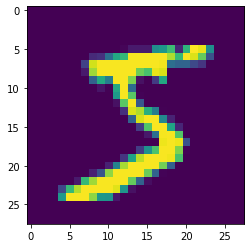

In [75]:
plt.imshow(x_train[0])
print(y_train[0])